<a href="https://colab.research.google.com/github/luispc1989/MachineLearning/blob/main/assig_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

In [ ]:
# Load dataset using ucimlrepo
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features.values  # Input size
y = wine_quality.data.targets.values.reshape(-1, 1)  # Output size

In [ ]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [ ]:
# Define the model
class WineQualityModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(WineQualityModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  # Model

    def forward(self, x):
        return self.linear(x)  # Forward pass

In [ ]:
# Instantiate model
input_size = X.shape[1]
output_size = 1
model = WineQualityModel(input_size, output_size)

In [ ]:
# Define loss function and optimizer
loss_function = nn.MSELoss()  # Loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Optimizer (gradient descent)

In [ ]:
# Training loop
epochs = 100  # Epochs
loss_values = []

for epoch in range(epochs):
    optimizer.zero_grad()  # Reset gradients
    predictions = model(X_tensor)  # Forward pass
    loss = loss_function(predictions, y_tensor)  # Compute loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights (gradient descent)
    loss_values.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/100, Loss: 23.9332
Epoch 20/100, Loss: 16.1259
Epoch 30/100, Loss: 10.9504
Epoch 40/100, Loss: 7.5060
Epoch 50/100, Loss: 5.2084
Epoch 60/100, Loss: 3.6733
Epoch 70/100, Loss: 2.6465
Epoch 80/100, Loss: 1.9591
Epoch 90/100, Loss: 1.4983
Epoch 100/100, Loss: 1.1891


In [ ]:
# Generate predictions for plotting
with torch.no_grad():
    y_pred = model(X_tensor).numpy()

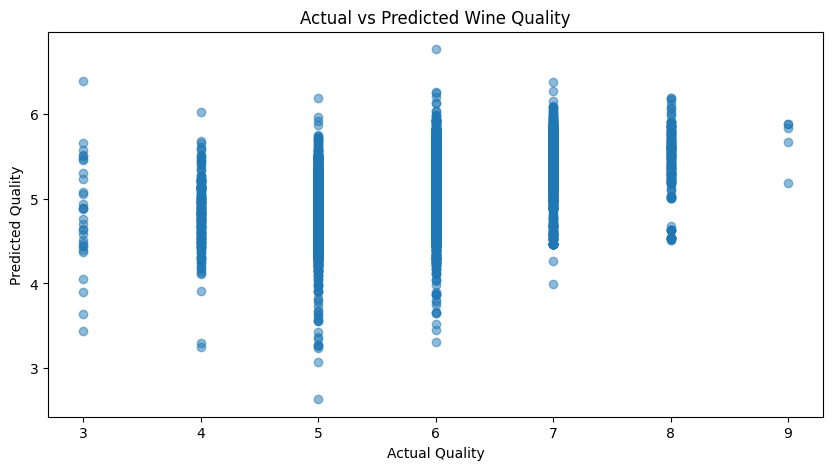

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.show()

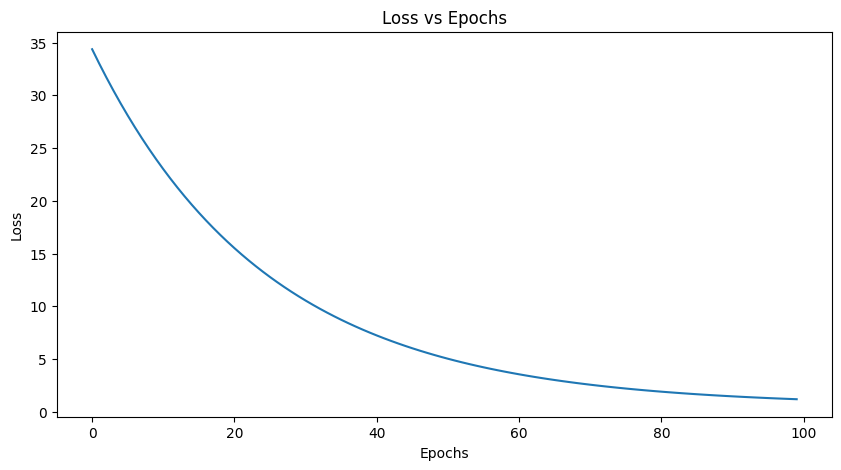

In [ ]:
# Plot loss vs epochs
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), loss_values)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()
